## EDA on Disaster Loss in Indonesia

1. Data Description

This dataset is downloaded from:

-https://data.world/unisdr/6abc5323-7218-4592-9ab3-70c7e659f366 (data from 1815 to 2014)

-https://gis.bnpb.go.id/ (data from 2014 to 2023)

2. Load Libraries and Dataset

In [2]:
# import the important libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime

In [3]:
disaster_data = pd.read_excel("data\disaster_data_in_Indonesia_1815-2023.xlsx").drop(columns="Unnamed: 0")

3. Data Exploration

3.1 Data Understanding

In [4]:
pd.options.display.max_columns = None
disaster_data


,Serial,Date (YMD),Event,Code Province,Province,Code District,District,Code Sub-District,Sub-District,Location,Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Houses Submerged,Public Facilities Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
0,NaN,2023-08-31,FOREST FIRE,NaN,KEPULAUAN BANGKA BELITUNG,1902.0,BELITUNG,NaN,NaN,Kec. Sijuk Ds. Keciput Kec. Tanjung Pandan D...,NaN,●dalam penyelidikan,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2023-08-31,FOREST FIRE,NaN,JAWA BARAT,3210.0,MAJALENGKA,NaN,NaN,Kec. Panyingkiran Ds. Karyamukti,NaN,●Penyebab Kebakaran diduga Akibat Human Error,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2023-08-31,FOREST FIRE,NaN,PAPUA BARAT,9101.0,FAK-FAK,NaN,NaN,Distrik. Bomberai Kamp. Bumi Moroh Indah Kamp...,NaN,●belum diketahui,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2023-08-31,DROUGHT,NaN,JAWA BARAT,3204.0,BANDUNG,NaN,NaN,Kec. Pamengpeuk Ds. Bojong Manggu Ds. Langon...,NaN,●Sumur sumber air warga di RT 05 / RW 03 selam...,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2023-08-31,FOREST FIRE,NaN,KALIMANTAN TIMUR,6409.0,PENAJAM PASER UTARA,NaN,NaN,Kec. Penajem Ds. Petung,NaN,●Masih dalam penyelidikan pihak Kepolisian.,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50737,8582.0,NaT,ERUPTION,35.0,JAWA TIMUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50738,8595.0,NaT,ERUPTION,34.0,DI YOGYAKARTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,1369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50739,8617.0,NaT,ERUPTION,34.0,DI YOGYAKARTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50740,8614.0,NaT,EARTHQUAKE,34.0,DI YOGYAKARTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,213.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
disaster_data.shape

(50742, 34)

In [6]:
disaster_data.size

1725228

In [7]:
disaster_data.columns

Index(['Serial', 'Date (YMD)', 'Event', 'Code Province', 'Province',
       'Code District', 'District', 'Code Sub-District', 'Sub-District',
       'Location', 'Comments', 'Cause', 'Description of Cause', 'Source',
       'Magnitude', 'GLIDEnumber', 'Other sectors', 'DataCards', 'Deaths',
       'Injured', 'Missing', 'Houses Destroyed', 'Houses Damaged',
       'Houses Submerged', 'Public Facilities Damaged', 'Victims', 'Affected',
       'Relocated', 'Evacuated', 'Losses $USD', 'Losses $Local',
       'Education centers', 'Hospitals', 'Damages in crops Ha.'],
      dtype='object')

In [8]:
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50742 entries, 0 to 50741
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Serial                     17931 non-null  float64       
 1   Date (YMD)                 50737 non-null  datetime64[ns]
 2   Event                      50742 non-null  object        
 3   Code Province              17931 non-null  float64       
 4   Province                   50742 non-null  object        
 5   Code District              50586 non-null  float64       
 6   District                   50586 non-null  object        
 7   Code Sub-District          0 non-null      float64       
 8   Sub-District               0 non-null      float64       
 9   Location                   24175 non-null  object        
 10  Comments                   14429 non-null  object        
 11  Cause                      15323 non-null  object        
 12  Desc

In [9]:
# we can change Date (YMD) to datetime type

# rename columns date to make it easier
disaster_data = disaster_data.rename(columns={'Date (YMD)': 'Date'})
# since the "Date" column is not in datetime format, we need to convert it

# disaster_data['Date'] = pd.to_datetime(disaster_data['Date'], format='%Y-%m-%d', errors='coerce')

# Replace missing day values with day 1
# disaster_data['Date'] = disaster_data['Date'].dt.replace(day=1)
# disaster_data['Date'] = disaster_data['Date'].dt.strftime('%Y-%m-%d')

# disaster_data['Date'] = pd.to_datetime(disaster_data['Date'])

In [10]:
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50742 entries, 0 to 50741
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Serial                     17931 non-null  float64       
 1   Date                       50737 non-null  datetime64[ns]
 2   Event                      50742 non-null  object        
 3   Code Province              17931 non-null  float64       
 4   Province                   50742 non-null  object        
 5   Code District              50586 non-null  float64       
 6   District                   50586 non-null  object        
 7   Code Sub-District          0 non-null      float64       
 8   Sub-District               0 non-null      float64       
 9   Location                   24175 non-null  object        
 10  Comments                   14429 non-null  object        
 11  Cause                      15323 non-null  object        
 12  Desc

In [11]:
disaster_data.sort_values(by=["Date"], ascending=False)

,Serial,Date,Event,Code Province,Province,Code District,District,Code Sub-District,Sub-District,Location,Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Houses Submerged,Public Facilities Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
0,NaN,2023-08-31,FOREST FIRE,NaN,KEPULAUAN BANGKA BELITUNG,1902.0,BELITUNG,NaN,NaN,Kec. Sijuk Ds. Keciput Kec. Tanjung Pandan D...,NaN,●dalam penyelidikan,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2023-08-31,DROUGHT,NaN,JAWA BARAT,3204.0,BANDUNG,NaN,NaN,Kec. Pamengpeuk Ds. Bojong Manggu Ds. Langon...,NaN,●Sumur sumber air warga di RT 05 / RW 03 selam...,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2023-08-31,FOREST FIRE,NaN,KALIMANTAN TIMUR,6409.0,PENAJAM PASER UTARA,NaN,NaN,Kec. Penajem Ds. Petung,NaN,●Masih dalam penyelidikan pihak Kepolisian.,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2023-08-31,FOREST FIRE,NaN,JAWA BARAT,3210.0,MAJALENGKA,NaN,NaN,Kec. Panyingkiran Ds. Karyamukti,NaN,●Penyebab Kebakaran diduga Akibat Human Error,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2023-08-31,FOREST FIRE,NaN,PAPUA BARAT,9101.0,FAK-FAK,NaN,NaN,Distrik. Bomberai Kamp. Bumi Moroh Indah Kamp...,NaN,●belum diketahui,Dokumentasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50737,8582.0,NaT,ERUPTION,35.0,JAWA TIMUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50738,8595.0,NaT,ERUPTION,34.0,DI YOGYAKARTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,1369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50739,8617.0,NaT,ERUPTION,34.0,DI YOGYAKARTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50740,8614.0,NaT,EARTHQUAKE,34.0,DI YOGYAKARTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.em-dat.net,NaN,NaN,NaN,1.0,213.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
disaster_data.describe()

,Serial,Date,Code Province,Code District,Code Sub-District,Sub-District,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Houses Submerged,Public Facilities Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
count,17931.000000,50737,17931.000000,50586.000000,0.0,0.0,0.0,0.0,0.0,17931.0,25131.000000,24830.000000,22886.000000,3307.000000,34247.000000,24991.000000,32811.000000,0.0,2.069000e+03,0.0,2139.000000,0.0,3.458000e+03,1129.000000,390.000000,3901.000000
mean,10459.852769,2015-12-06 17:22:03.649407744,38.971111,3806.604831,NaN,NaN,NaN,NaN,NaN,1.0,12.315825,19.384696,0.984619,332.374660,60.660204,233.400464,1.150285,NaN,1.129041e+04,NaN,4275.509116,NaN,1.359787e+05,31.875996,12.153846,974.515235
min,1.000000,1815-04-10 00:00:00,11.000000,1101.000000,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,1.000000e+00,NaN,1.000000,NaN,3.000000e-01,1.000000,1.000000,0.030000
25%,4489.500000,2011-12-11 00:00:00,32.000000,3201.000000,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,1.600000e+01,NaN,31.000000,NaN,1.500000e+01,1.000000,1.000000,19.000000
50%,10309.000000,2017-12-10 00:00:00,33.000000,3314.000000,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,NaN,1.600000e+02,NaN,200.000000,NaN,5.750000e+01,2.000000,2.000000,86.000000
75%,16509.500000,2021-01-09 00:00:00,53.000000,5201.000000,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,33.000000,3.000000,12.000000,0.000000,NaN,1.770000e+03,NaN,1248.500000,NaN,2.500000e+02,8.000000,6.000000,367.000000
max,21013.000000,2023-08-31 00:00:00,94.000000,9471.000000,NaN,NaN,NaN,NaN,NaN,1.0,77804.000000,56213.000000,5001.000000,96576.000000,96576.000000,104114.000000,2037.000000,NaN,4.238797e+06,NaN,802804.000000,NaN,2.347500e+08,3547.000000,1000.000000,259384.000000
std,6471.663447,NaN,20.037802,1916.131115,NaN,NaN,NaN,NaN,NaN,0.0,653.005170,537.988060,44.204978,3173.948978,1248.770175,1694.753236,21.856835,NaN,1.387253e+05,NaN,28257.123622,NaN,4.673749e+06,185.020026,55.704296,7215.673879


In [13]:
disaster_data.describe(include="all")

,Serial,Date,Event,Code Province,Province,Code District,District,Code Sub-District,Sub-District,Location,Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Houses Submerged,Public Facilities Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
count,17931.000000,50737,50742,17931.000000,50742,50586.000000,50586,0.0,0.0,24175,14429,15323,32811,17553,0.0,0.0,0.0,17931.0,25131.000000,24830.000000,22886.000000,3307.000000,34247.000000,24991.000000,32811.000000,0.0,2.069000e+03,0.0,2139.000000,0.0,3.458000e+03,1129.000000,390.000000,3901.000000
unique,NaN,NaN,20,NaN,39,NaN,551,NaN,NaN,18733,11123,8575,1,5047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,FLOODS,NaN,JAWA TENGAH,NaN,BOGOR,NaN,NaN,NULL\t,0,• Akibat hujan dengan intensitas tinggi,Dokumentasi,Deptan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,15900,NaN,9880,NaN,2229,NaN,NaN,1804,1399,536,32811,1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10459.852769,2015-12-06 17:22:03.649407744,NaN,38.971111,NaN,3806.604831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.315825,19.384696,0.984619,332.374660,60.660204,233.400464,1.150285,NaN,1.129041e+04,NaN,4275.509116,NaN,1.359787e+05,31.875996,12.153846,974.515235
min,1.000000,1815-04-10 00:00:00,NaN,11.000000,NaN,1101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,1.000000e+00,NaN,1.000000,NaN,3.000000e-01,1.000000,1.000000,0.030000
25%,4489.500000,2011-12-11 00:00:00,NaN,32.000000,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,1.600000e+01,NaN,31.000000,NaN,1.500000e+01,1.000000,1.000000,19.000000
50%,10309.000000,2017-12-10 00:00:00,NaN,33.000000,NaN,3314.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,NaN,1.600000e+02,NaN,200.000000,NaN,5.750000e+01,2.000000,2.000000,86.000000
75%,16509.500000,2021-01-09 00:00:00,NaN,53.000000,NaN,5201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,33.000000,3.000000,12.000000,0.000000,NaN,1.770000e+03,NaN,1248.500000,NaN,2.500000e+02,8.000000,6.000000,367.000000
max,21013.000000,2023-08-31 00:00:00,NaN,94.000000,NaN,9471.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,77804.000000,56213.000000,5001.000000,96576.000000,96576.000000,104114.000000,2037.000000,NaN,4.238797e+06,NaN,802804.000000,NaN,2.347500e+08,3547.000000,1000.000000,259384.000000


In [14]:
disaster_data.nunique()

Serial                       17931
Date                          7322
Event                           20
Code Province                   34
Province                        39
Code District                  518
District                       551
Code Sub-District                0
Sub-District                     0
Location                     18733
Comments                     11123
Cause                         8575
Description of Cause             1
Source                        5047
Magnitude                        0
GLIDEnumber                      0
Other sectors                    0
DataCards                        1
Deaths                         166
Injured                        317
Missing                         76
Houses Destroyed               414
Houses Damaged                 679
Houses Submerged              1699
Public Facilities Damaged      128
Victims                          0
Affected                       931
Relocated                        0
Evacuated           

3.2 Data Preparation (Data Cleaning)

In [15]:
# there's so many null columns inserted in the dataset
# i think it's better to remove unused columns and we can filter it based on total nulls of the dataset

missed_data = disaster_data.isnull().sum()
missed_data

Serial                       32811
Date                             5
Event                            0
Code Province                32811
Province                         0
Code District                  156
District                       156
Code Sub-District            50742
Sub-District                 50742
Location                     26567
Comments                     36313
Cause                        35419
Description of Cause         17931
Source                       33189
Magnitude                    50742
GLIDEnumber                  50742
Other sectors                50742
DataCards                    32811
Deaths                       25611
Injured                      25912
Missing                      27856
Houses Destroyed             47435
Houses Damaged               16495
Houses Submerged             25751
Public Facilities Damaged    17931
Victims                      50742
Affected                     48673
Relocated                    50742
Evacuated           

In [16]:
missed_data_2 = (disaster_data.isnull().sum() / len(disaster_data)) *100
missed_data_2

Serial                        64.662410
Date                           0.009854
Event                          0.000000
Code Province                 64.662410
Province                       0.000000
Code District                  0.307438
District                       0.307438
Code Sub-District            100.000000
Sub-District                 100.000000
Location                      52.357022
Comments                      71.563990
Cause                         69.802136
Description of Cause          35.337590
Source                        65.407355
Magnitude                    100.000000
GLIDEnumber                  100.000000
Other sectors                100.000000
DataCards                     64.662410
Deaths                        50.472981
Injured                       51.066178
Missing                       54.897324
Houses Destroyed              93.482716
Houses Damaged                32.507587
Houses Submerged              50.748887
Public Facilities Damaged     35.337590


In [17]:
# we can see the percentage of the missing values in the columns

pd.concat([missed_data,missed_data_2],axis=1,keys=['Total','Missing (%)'])

,Total,Missing (%)
Serial,32811,64.662410
Date,5,0.009854
Event,0,0.000000
Code Province,32811,64.662410
Province,0,0.000000
Code District,156,0.307438
District,156,0.307438
Code Sub-District,50742,100.000000
Sub-District,50742,100.000000
Location,26567,52.357022


<Axes: >

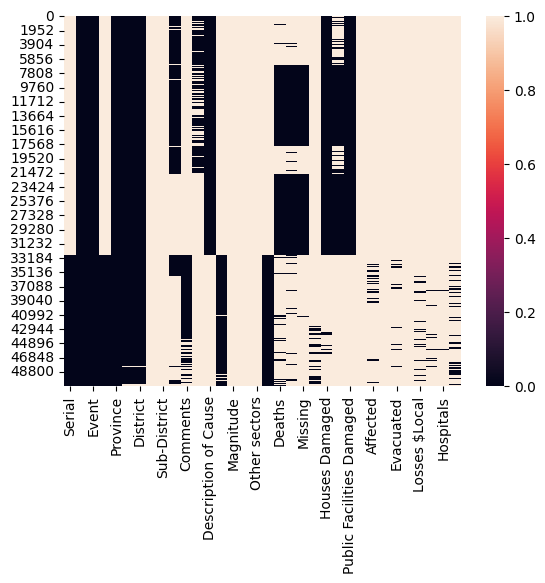

In [18]:
sns.heatmap(disaster_data.isnull())   

In [34]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df.isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def summary_table(df):

    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

def heatmap(df, index,columns,values,vmax,Title):
    DisasterDuration_wide = df.pivot(index=index, columns=columns, values=values)
    #DisasterDuration_wide = DisasterDuration_wide.sort_values(by = sort_by, ascending = False)#ignore_index = True)

    plt.figure(figsize=(12,8))

    ax = sns.heatmap(DisasterDuration_wide, annot=True, fmt='.0f', yticklabels='auto', cmap=sns.color_palette("YlGnBu", as_cmap=True), center=.2,vmin = 0, vmax = vmax,linewidths=.5)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.set_title(Title,fontsize = 16,weight = 'bold',pad=20)
    plt.show()
    
def histplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x)
    plt.xticks(rotation=70,fontsize = 8)
    ax.set_xlabel(x_axis_title)
    ax.set_ylabel(y_axys_title)
    plt.title(plot_title, fontsize = 16,weight = 'bold')    

def bar_plot(x,y,xlabel,ylabel,title, label):
    plt.figure(figsize=(25,5))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.barplot(x=x, y = y, palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=90,fontsize = 12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    
    if label == 'percent':
        for p in ax.patches:
                     ax.annotate("%.1f%%" % (100*float(p.get_height()/50742)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                         ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'vertical',
                         textcoords='offset points')
    if label == 'number':
        for p in ax.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                 ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
                 textcoords='offset points')
    

def Null_Analysis(df,title):
    null_columns=df.columns[df.isnull().any()]
    null_columns_plot = df[null_columns].isnull().sum().sort_values(ascending = False)
    bar_plot(null_columns_plot.index, null_columns_plot,"Features", "Number of Null Values", title, 'percent')



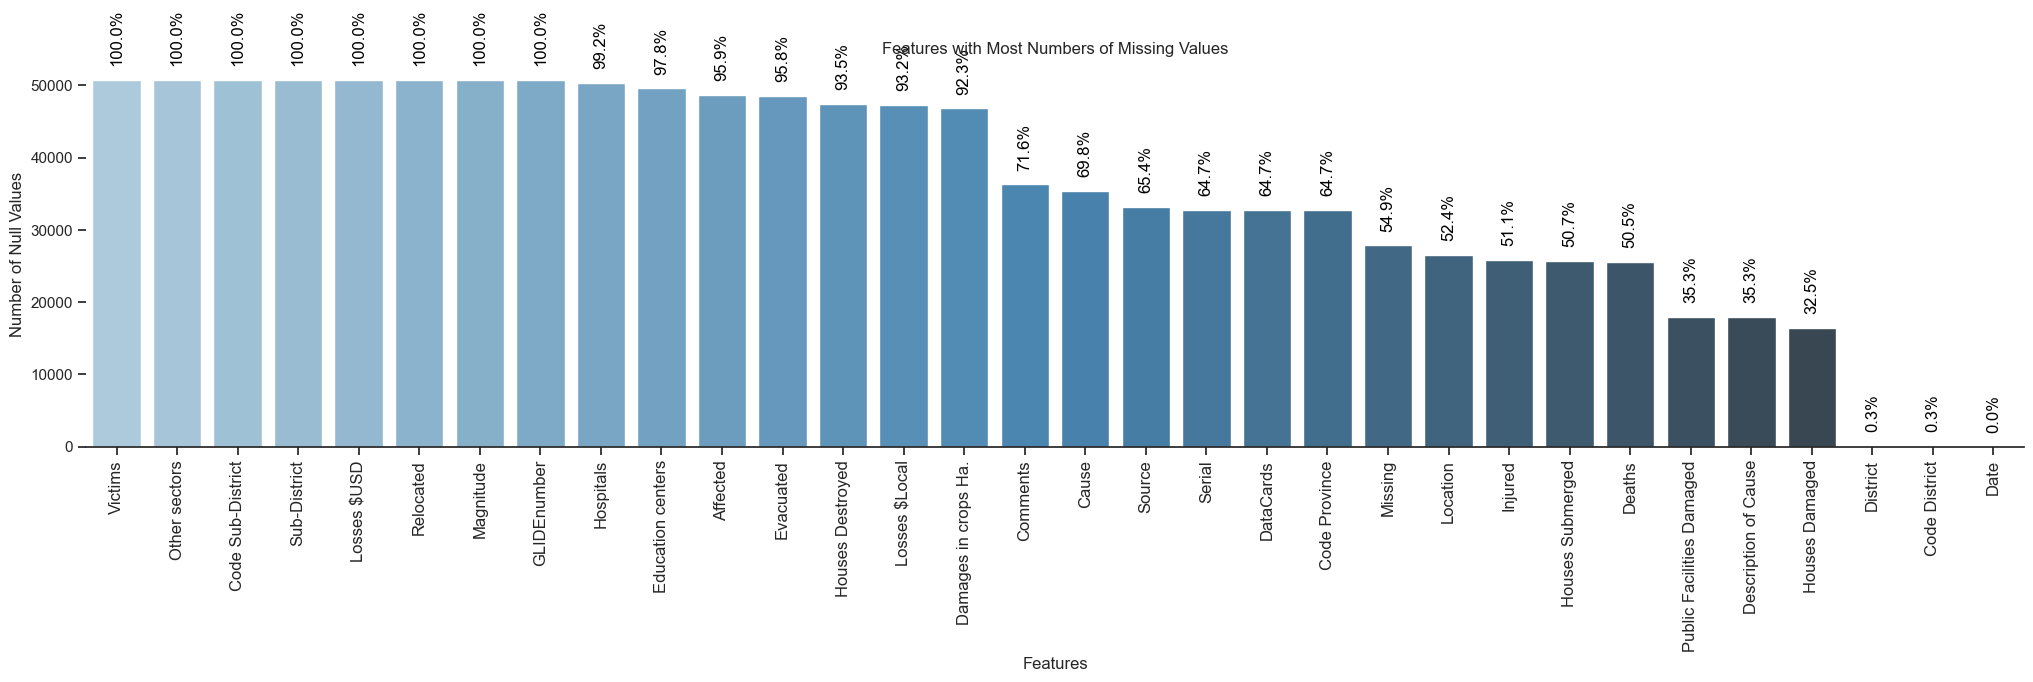

In [35]:
Null_Analysis(disaster_data, 'Features with Most Numbers of Missing Values')

In [44]:

disaster_data_filter = disaster_data.filter(items=["Date (YMD)",
                                                   "Serial",
                                                   "Event",
                                                   "Province",
                                                   "Deaths",
                                                   "Injured",
                                                   "Missing",
                                                   "Houses Destroyed",
                                                   "Houses Damaged",
                                                   "Affected",
                                                   "Evacuated",
                                                   "Losses $Local",
                                                   "Hospitals",
                                                   "Damages in crops Ha.",
                                                   ])
#  0   Serial                17931 non-null  int64  
#  1   Event                 17931 non-null  object 
#  2   Code Province         17931 non-null  int64  
#  3   Province              17931 non-null  object 
#  4   Code District         17775 non-null  float64
#  5   District              17775 non-null  object 
#  6   Code Sub-District     0 non-null      float64
#  7   Sub-District          0 non-null      float64
#  8   Location              3472 non-null   object 
#  9   Date (YMD)            17931 non-null  object 
#  10  Comments              14429 non-null  object 
#  11  Cause                 0 non-null      float64
#  12  Description of Cause  0 non-null      float64
#  13  Source                17553 non-null  object 
#  14  Magnitude             0 non-null      float64
#  15  GLIDEnumber           0 non-null      float64
#  16  Other sectors         0 non-null      float64
#  17  DataCards             17931 non-null  int64  
#  18  Deaths                2333 non-null   float64
#  19  Injured               1851 non-null   float64
#  20  Missing               381 non-null    float64
#  21  Houses Destroyed      3307 non-null   float64
#  22  Houses Damaged        1437 non-null   float64
#  23  Victims               0 non-null      float64
#  24  Affected              2069 non-null   float64
#  25  Relocated             0 non-null      float64
#  26  Evacuated             2139 non-null   float64
#  27  Losses $USD           0 non-null      float64
#  28  Losses $Local         3458 non-null   float64
#  29  Education centers     1129 non-null   float64
#  30  Hospitals             390 non-null    float64
#  31  Damages in crops Ha.  3901 non-null   float64

In [45]:
# rename columns date to make it easier
disaster_data_filter = disaster_data_filter.rename(columns={'Date (YMD)': 'Date'})
# since the "Date" column is not in datetime format, we need to convert it

disaster_data_filter['Date'] = pd.to_datetime(disaster_data_filter['Date'], format='%Y/%m/%d', errors='coerce')

# Replace missing day values with day 1
# disaster_data_filter['Date'] = disaster_data_filter['Date'].dt.replace(day=1)
disaster_data_filter['Date'] = disaster_data_filter['Date'].dt.strftime('%Y-%m-%d')

disaster_data_filter['Date'] = pd.to_datetime(disaster_data_filter['Date'])
disaster_data_filter
disaster_data_filter.dtypes

Date                    datetime64[ns]
Serial                           int64
Event                           object
Province                        object
Deaths                         float64
Injured                        float64
Missing                        float64
Houses Destroyed               float64
Houses Damaged                 float64
Affected                       float64
Evacuated                      float64
Losses $Local                  float64
Hospitals                      float64
Damages in crops Ha.           float64
dtype: object

In [66]:
# see the unique event in the dataset
sorted(disaster_data_filter["Event"].unique().tolist())

['CLIMATE CHANGE',
 'CONFLICT',
 'DROUGHT',
 'EARTHQUAKE',
 'EARTHQUAKE AND TSUNAMI',
 'EPIDEMIC',
 'ERUPTION',
 'FIRE',
 'FLOODS',
 'FLOODS AND LANDSLIDES',
 'FOREST FIRE',
 'HUNGER',
 'INDUSTRIAL ACCIDENT',
 'LANDSLIDES',
 'PLAGUE',
 'STRONG WIND',
 'SURGE',
 'TERRORISM',
 'TRANSPORTATION ACCIDENT',
 'TSUNAMI']

source: https://www.researchgate.net/publication/311318085_Annual_Disaster_Statistical_Review_2015_The_numbers_and_trends

<center> Natural disaster subgroup classification </center>

<center>
<img src="https://www.researchgate.net/profile/Alizee-Vanderveken/publication/311318085/figure/fig1/AS:434834096037898@1480683935544/Natural-disaster-subgroup-classification.png">
</center>

<center>
<img src="https://www.researchgate.net/profile/Sofiane-Amara/publication/330400757/figure/fig1/AS:715418570350593@1547580487185/Classification-of-natural-disasters-16.ppm">
</center>

In [46]:

# see the unique province in the dataset
disaster_data_filter["Province"].unique().tolist()

['BALI',
 'NUSA TENGGARA BARAT',
 'NUSA TENGGARA TIMUR',
 'SUMATERA UTARA',
 'JAWA TENGAH',
 'KALIMANTAN BARAT',
 'JAWA TIMUR',
 'KALIMANTAN TENGAH',
 'JAWA BARAT',
 'KALIMANTAN SELATAN',
 'JAMBI',
 'RIAU',
 'SUMATERA SELATAN',
 'LAMPUNG',
 'DI YOGYAKARTA',
 'BANTEN',
 'PEMERINTAH ACEH',
 'KALIMANTAN TIMUR',
 'SULAWESI UTARA',
 'SULAWESI TENGAH',
 'SULAWESI SELATAN',
 'PAPUA',
 'SUMATERA BARAT',
 'SULAWESI BARAT',
 'SULAWESI TENGGARA',
 'KEPULAUAN RIAU',
 'GORONTALO',
 'BENGKULU',
 'KALIMANTAN UTARA',
 'DKI JAKARTA',
 'BANGKA-BELITUNG',
 'MALUKU',
 'MALUKU UTARA',
 'PAPUA BARAT']

In [47]:
disaster_data_filter.describe()
disaster_data_filter.describe(include='all')
# see the containing unique data in every columns

disaster_data_filter.nunique()

Date                     4095
Serial                  17931
Event                      20
Province                   34
Deaths                    156
Injured                   290
Missing                    70
Houses Destroyed          414
Houses Damaged            415
Affected                  931
Evacuated                 933
Losses $Local             922
Hospitals                  52
Damages in crops Ha.     1124
dtype: int64

In [48]:
# disaster_data_filter_event_count = disaster_data_filter.groupby('Event').agg(['count', 'mean', 'std', 'min', 'max'])

# disaster_data_filter_event_count.columns = [f'{col[0]}_{col[1]}' for col in disaster_data_filter_event_count.columns]

# disaster_data_filter_event_count

# # grouped_data = df.groupby('Category').agg(['mean', 'std', 'min', 'max'])